In [2]:
# %matplotlib inline
# from matplotlib import style
# style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
# from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()[0]

print(f"The most recent date in the data set is: {most_recent_date}")

The most recent date in the data set is: 2017-08-23


In [11]:
most_recent_date

'2017-08-23'

In [12]:
type(most_recent_date)

str

In [13]:
str(most_recent_date)

'2017-08-23'

In [14]:
type(str(most_recent_date))

str

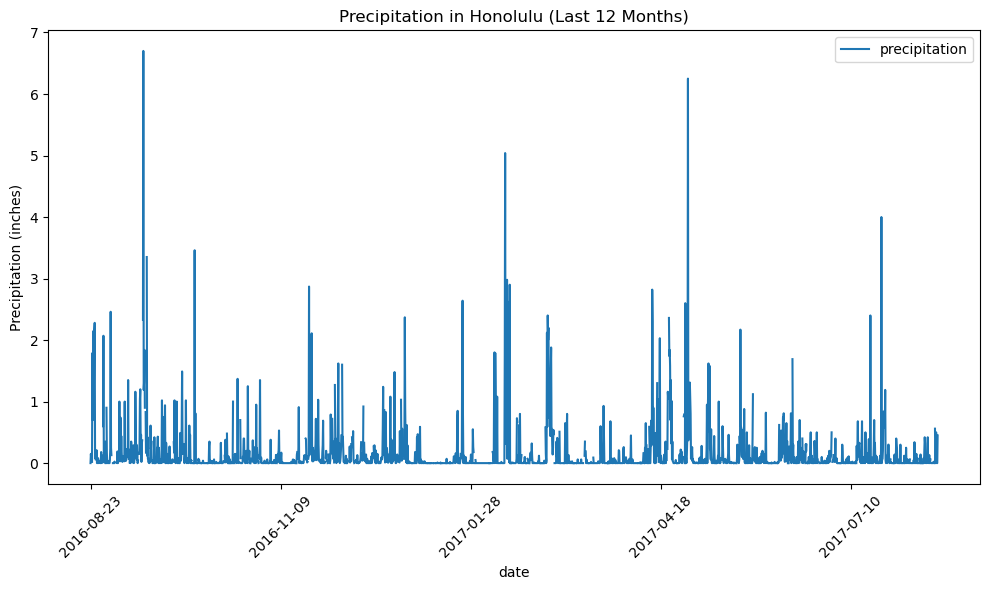

In [15]:
# # Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# # Starting from the most recent data point in the database. 
# most_recent_date = session.query(func.max(Measurement.date)).scalar()





####################### changed most_recent date to type string
most_recent_date = dt.datetime.strptime(str(most_recent_date), '%Y-%m-%d').date()
# most_recent_date

# # Calculate the date one year from the last date in data set.
one_year_ago = most_recent_date - dt.timedelta(days=365)

# # Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date >= one_year_ago)\
    .order_by(Measurement.date).all()

# # # Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'precipitation'])
precipitation_df



# # # Sort the dataframe by date
precipitation_df.sort_values(by='date', inplace=True)



# # # Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x='date', y='precipitation', figsize=(10, 6), rot=45)
plt.title("Precipitation in Honolulu (Last 12 Months)")
plt.xlabel("date")
plt.ylabel("Precipitation (inches)")
plt.tight_layout()
plt.show()


In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = precipitation_df.describe()
summary_statistics

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()

print(f'The total number of stations in the dataset is: {total_stations}')

The total number of stations in the dataset is: 9


In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
station_activity = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc()).all()

# List the stations and their counts in descending order.
print("Most Active Stations:")
for station, count in station_activity:
    print(f"Station ID: {station}, Count: {count}")

Most Active Stations:
Station ID: USC00519281, Count: 2772
Station ID: USC00519397, Count: 2724
Station ID: USC00513117, Count: 2709
Station ID: USC00519523, Count: 2669
Station ID: USC00516128, Count: 2612
Station ID: USC00514830, Count: 2202
Station ID: USC00511918, Count: 1979
Station ID: USC00517948, Count: 1372
Station ID: USC00518838, Count: 511


In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = station_activity[0][0]
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
    .filter(Measurement.station == most_active_station_id).all()

min_temp, max_temp, avg_temp = temperature_stats[0]

print(f"Temperature Statistics for the Most Active Station (Station ID: {most_active_station_id}):")
print(f"Lowest Temperature: {min_temp} °F")
print(f"Highest Temperature: {max_temp} °F")
print(f"Average Temperature: {avg_temp:.2f} °F")

Temperature Statistics for the Most Active Station (Station ID: USC00519281):
Lowest Temperature: 54.0 °F
Highest Temperature: 85.0 °F
Average Temperature: 71.66 °F


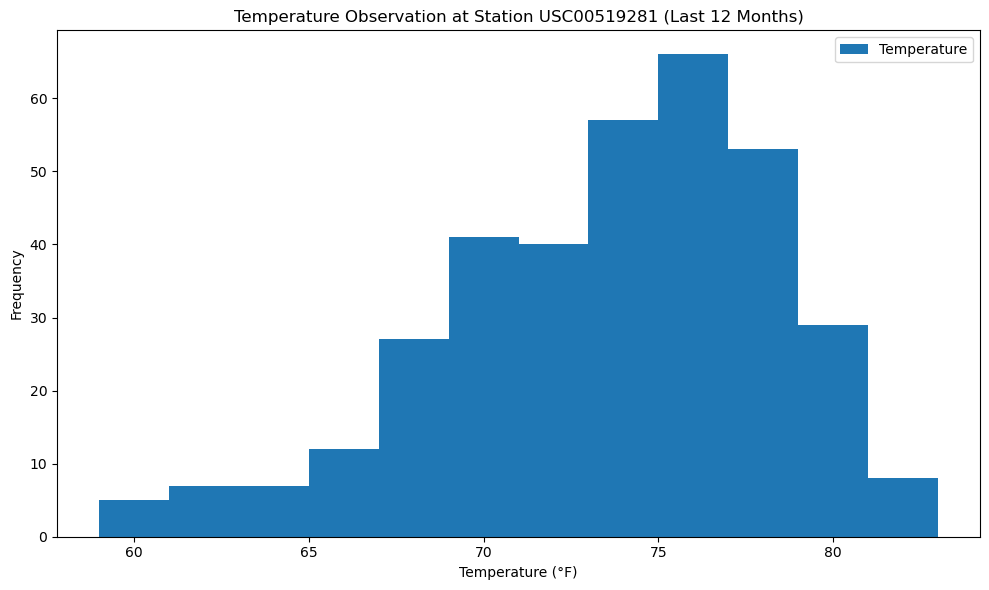

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data_most_active = session.query(Measurement.date, Measurement.tobs)\
    .filter(Measurement.date >= one_year_ago, Measurement.station == most_active_station_id)\
    .all()

temperature_df_most_active = pd.DataFrame(temperature_data_most_active, columns=['Date', 'Temperature'])
temperature_df_most_active.set_index('Date', inplace=True)

temperature_df_most_active.plot(kind='hist', bins=12, figsize=(10, 6))
plt.title(f"Temperature Observation at Station {most_active_station_id} (Last 12 Months)")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Close Session

In [21]:
# Close Session
session.close()